In [4]:
from helpers import data_preprocessing, get_cross_validation_data, compute_loss_rlr, \
 mse_loss, sigmoid, build_poly, predict_labels, create_csv_submission, split_data
from models import reg_logistic_regression, ridge_regression
from proj1_helpers import load_csv_data, create_csv_submission, predict_labels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%load_ext autoreload
%autoreload 2
%aimport helpers
%aimport models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
y, x, _ = load_csv_data("./data/train.csv")
X = data_preprocessing(x, percent=0.5 ,nan='mean', normalize=False)


In [82]:

pca = PCA(n_components=2)
data = pca.fit_transform(build_poly(X,7))
data = np.concatenate([data, y.reshape(-1,1)], axis = 1)


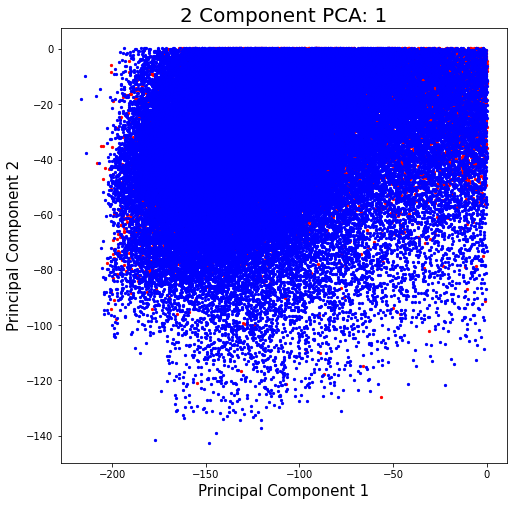

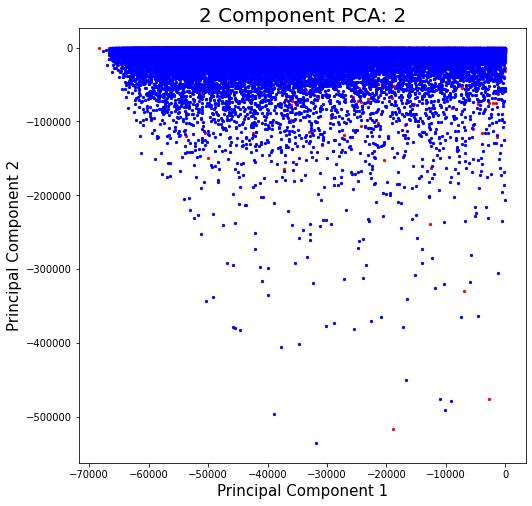

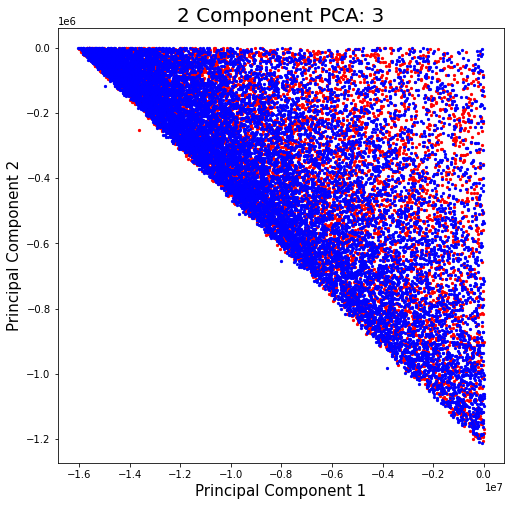

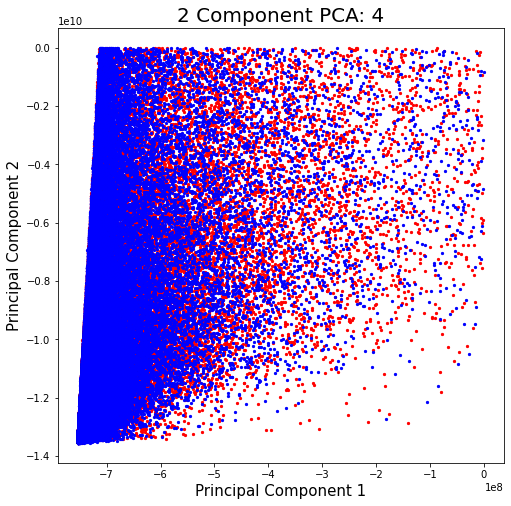

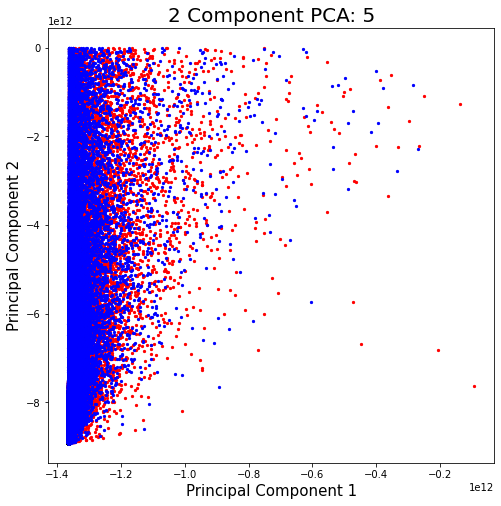

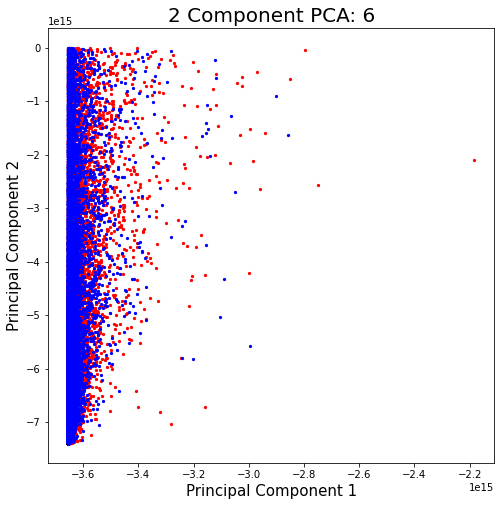

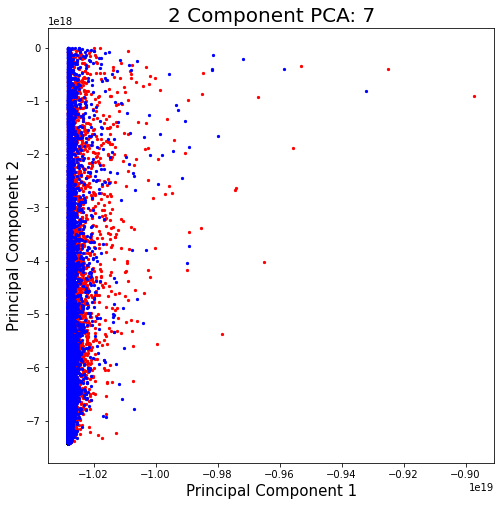

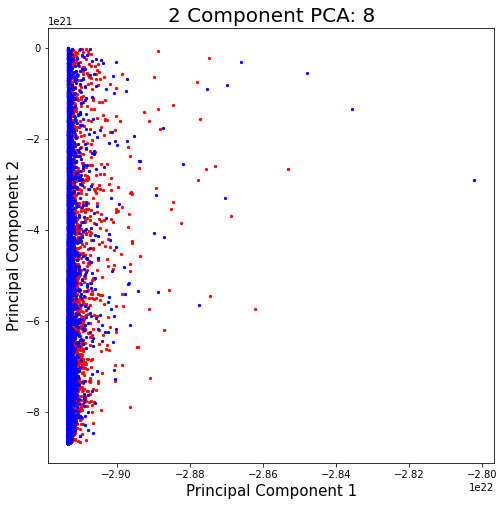

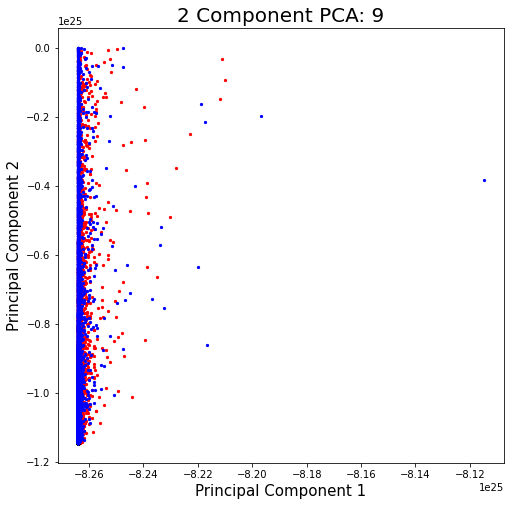

In [5]:
for i in range(1,10):
    pca = PCA(n_components=2)
    # data = pca.fit_transform(build_poly(X,i))
    data = pca.fit_transform(X**i)

    data = np.concatenate([data, y.reshape(-1,1)], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 Component PCA: ' + str(i), fontsize = 20)

    data = data[data[:,1]<0.5]
    data = data[data[:,0]<0.001]

    targets = [1, -1]
    colors = ['r', 'b']
    for target, color in zip(targets,colors):
        ax.scatter(data[data[:,2]==target][:,0], data[data[:,2]==target][:,1], c = color, s = 5)

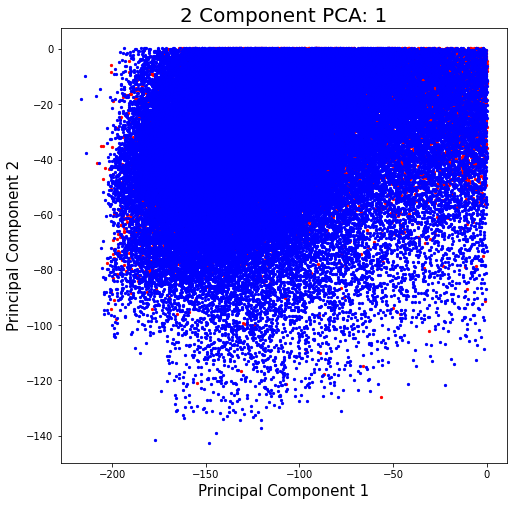

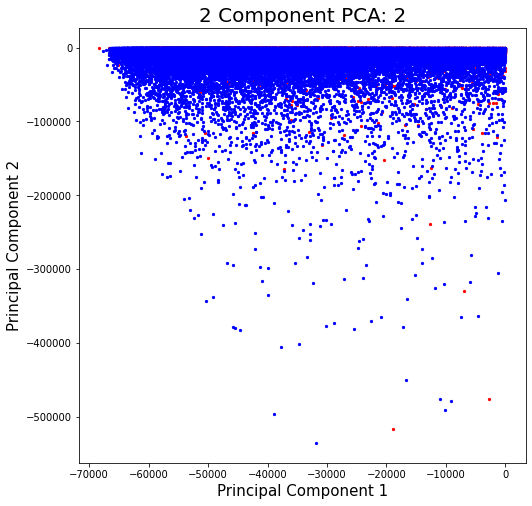

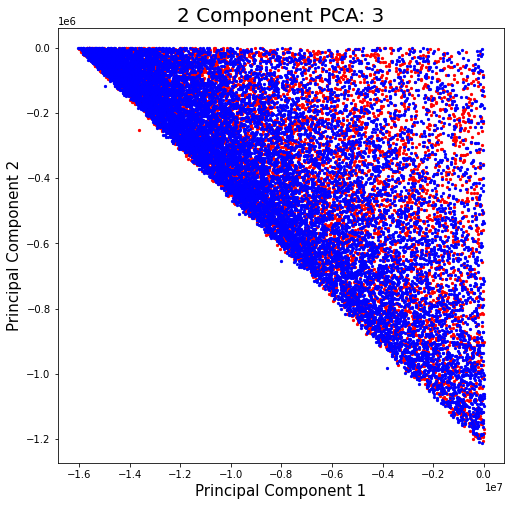

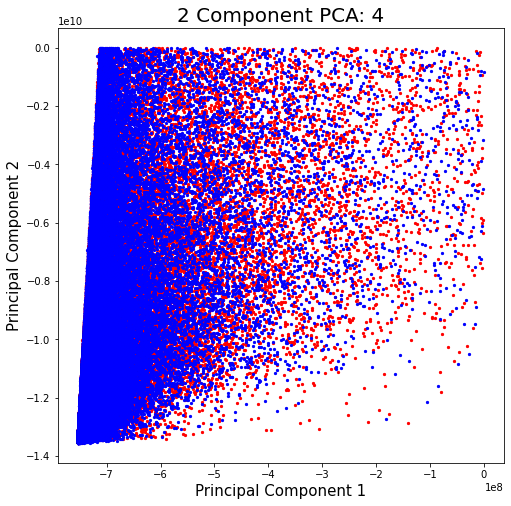

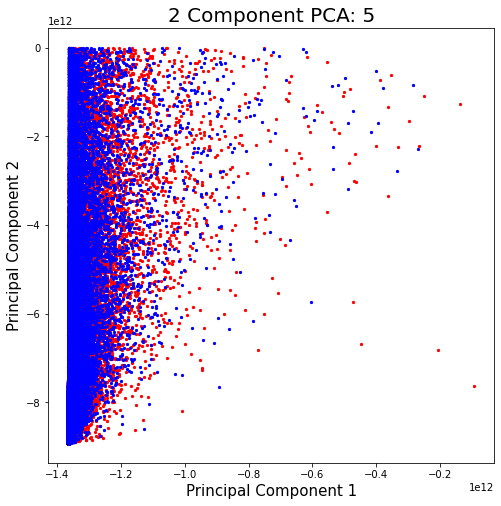

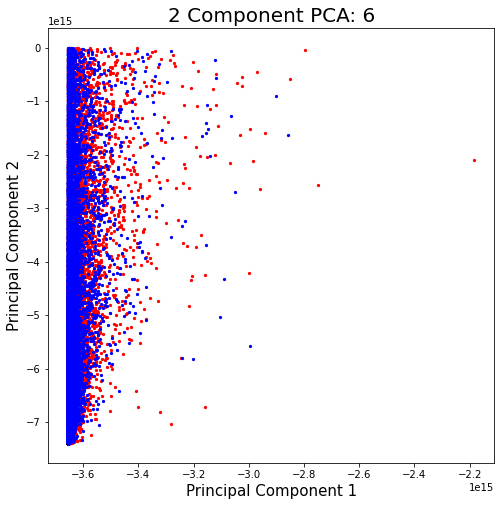

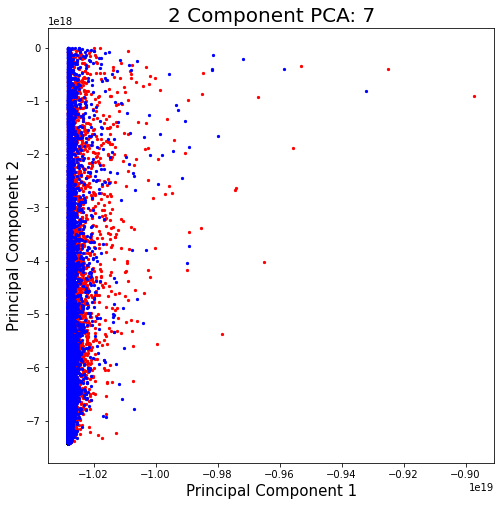

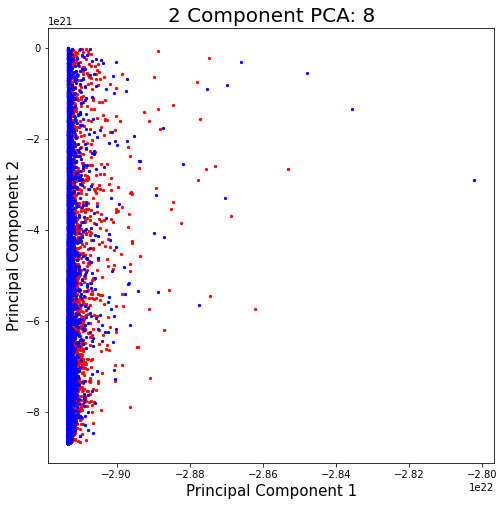

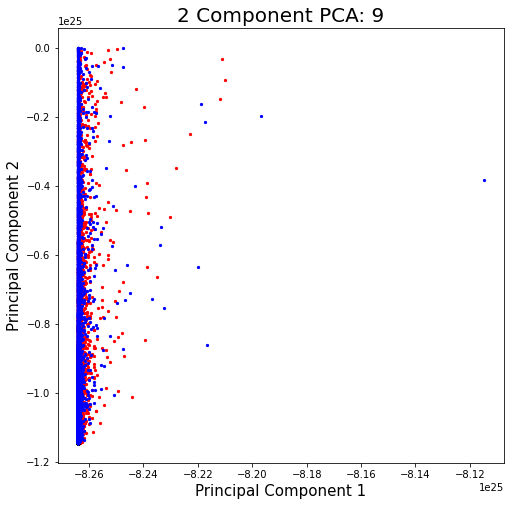

In [87]:
for i in range(1,10):
    pca = PCA(n_components=2)
    # data = pca.fit_transform(build_poly(X,i))
    data = pca.fit_transform(build_poly(X,i))

    data = np.concatenate([data, y.reshape(-1,1)], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 Component PCA: ' + str(i), fontsize = 20)

    data = data[data[:,1]<0.5]
    data = data[data[:,0]<0.001]

    targets = [1, -1]
    colors = ['r', 'b']
    for target, color in zip(targets,colors):
        ax.scatter(data[data[:,2]==target][:,0], data[data[:,2]==target][:,1], c = color, s = 5)

In [29]:
nb_classes = len(np.unique(data_df.values[:,24]))
targets = data_df.values[:,24].reshape(-1)
targets = targets.astype("int",copy=False)
one_hot_targets = np.eye(len(targets),nb_classes)[targets]

In [30]:
one_hot_targets

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [3]:
float_feat_df = data_df.drop(['Id', 'Prediction', 'PRI_jet_num'], axis=1)
float_feat_df

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,16.824,-0.277,258.733,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,44.704,-1.916,164.546,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,54.283,-2.186,260.414,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,31.082,0.060,86.062,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,2.723,-0.871,53.131,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,...,46.520,2.859,144.665,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,...,46.737,-0.867,80.408,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,...,23.419,-2.890,198.907,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,...,12.150,0.811,112.718,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [4]:
float_feat_df = data_df.drop(['Id', 'Prediction', 'PRI_jet_num'], axis=1).astype('float64')
float_feat_df = float_feat_df.replace(-999.0,np.nan)
float_feat_df = float_feat_df.replace(0.0, np.nan)
# float_feat_df = float_feat_df.dropna()
float_feat_df

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,16.824,-0.277,258.733,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,...,44.704,-1.916,164.546,46.226,0.725,1.158,NaN,NaN,NaN,46.226
2,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,...,54.283,-2.186,260.414,44.251,2.053,-2.028,NaN,NaN,NaN,44.251
3,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,...,31.082,0.060,86.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,...,2.723,-0.871,53.131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,NaN,71.989,36.548,5.042,NaN,NaN,NaN,1.392,5.042,55.892,...,46.520,2.859,144.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249996,NaN,58.179,68.083,22.439,NaN,NaN,NaN,2.585,22.439,50.618,...,46.737,-0.867,80.408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249997,105.457,60.526,75.839,39.757,NaN,NaN,NaN,2.390,22.183,120.462,...,23.419,-2.890,198.907,41.992,1.800,-0.166,NaN,NaN,NaN,41.992
249998,94.951,19.362,68.812,13.504,NaN,NaN,NaN,3.365,13.504,55.859,...,12.150,0.811,112.718,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# float_feat_df = float_feat_df.drop(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'], axis=1)

In [6]:
float_feat_df = float_feat_df.fillna(value=float_feat_df.mean(axis=0))
float_feat_df = (float_feat_df - float_feat_df.mean(axis=0)) / float_feat_df.std(axis=0) 
# float_feat_df = (float_feat_df - float_feat_df.min(axis=0)) / (float_feat_df.max(axis=0) - float_feat_df.min(axis=0))

In [7]:
float_feat_df

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,3.149100e-01,0.068316,0.407679,-0.470146,-1.591972e+00,-1.153304e+00,1.806721e+00,0.882476,1.033022,0.339894,...,-0.756755,-0.147266,0.386846,-3.699198e-01,1.557295e+00,3.248248e-01,-6.742627e-01,1.143818e+00,-2.527138e+00,-1.054813e-01
1,7.408255e-01,0.552493,0.540135,-0.153327,7.906289e-12,-6.304965e-12,-1.062807e-12,1.404885,-0.756201,-0.287584,...,0.090798,-1.051680,-0.357718,-8.211525e-01,5.267042e-01,8.329926e-01,-8.402849e-12,-9.732050e-16,-7.006297e-15,-9.701174e-01
2,-1.001901e-12,3.195170,1.096558,-0.349882,7.906289e-12,-6.304965e-12,-1.062807e-12,0.989768,-0.430324,0.340360,...,0.382000,-1.200669,0.400135,-8.631717e-01,1.487142e+00,-1.434546e+00,-8.402849e-12,-9.732050e-16,-7.006297e-15,-9.955021e-01
3,4.179434e-01,0.910371,-0.005853,-0.903224,7.906289e-12,-6.304965e-12,-1.062807e-12,1.196688,-0.830913,-0.712704,...,-0.323312,0.038693,-0.978148,2.894636e-12,1.005616e-14,-2.281362e-14,-8.402849e-12,-9.732050e-16,-7.006297e-15,-1.036370e-12
4,1.023802e+00,-0.914582,1.313366,-0.651996,7.906289e-12,-6.304965e-12,-1.062807e-12,1.938790,-0.112934,-0.868141,...,-1.185426,-0.475040,-1.238473,2.894636e-12,1.005616e-14,-2.281362e-14,-8.402849e-12,-9.732050e-16,-7.006297e-15,-1.036370e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-1.001901e-12,0.643625,-1.093201,-0.830516,7.906289e-12,-6.304965e-12,-1.062807e-12,-1.253143,-0.623120,-0.886213,...,0.146004,1.583206,-0.514881,2.894636e-12,1.005616e-14,-2.281362e-14,-8.402849e-12,-9.732050e-16,-7.006297e-15,-1.036370e-12
249996,-1.001901e-12,0.252899,-0.320828,-0.557199,7.906289e-12,-6.304965e-12,-1.062807e-12,0.270657,0.157987,-0.931794,...,0.152601,-0.472833,-1.022843,2.894636e-12,1.005616e-14,-2.281362e-14,-8.402849e-12,-9.732050e-16,-7.006297e-15,-1.036370e-12
249997,-3.109301e-01,0.319303,-0.130863,-0.285123,7.906289e-12,-6.304965e-12,-1.062807e-12,0.021586,0.146492,-0.328161,...,-0.556267,-1.589142,-0.086089,-9.112331e-01,1.304167e+00,-1.093241e-01,-8.402849e-12,-9.732050e-16,-7.006297e-15,-1.024537e+00
249998,-5.100963e-01,-0.845349,-0.302973,-0.697573,7.906289e-12,-6.304965e-12,-1.062807e-12,1.266938,-0.243185,-0.886498,...,-0.898845,0.453102,-0.767427,2.894636e-12,1.005616e-14,-2.281362e-14,-8.402849e-12,-9.732050e-16,-7.006297e-15,-1.036370e-12


In [8]:
cate_col_df = pd.get_dummies(data_df['PRI_jet_num'])
cate_col_df

,0,1,2,3
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
249995,1,0,0,0
249996,1,0,0,0
249997,0,1,0,0
249998,1,0,0,0


In [9]:
y =  data_df['Prediction'].apply(lambda x: -1 if x=='b' else 1).to_numpy()
x = float_feat_df.join(cate_col_df).to_numpy()

In [10]:
x

array([[ 3.14910026e-01,  6.83159081e-02,  4.07679457e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 7.40825545e-01,  5.52493434e-01,  5.40135334e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.00190088e-12,  3.19516963e+00,  1.09655778e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-3.10930051e-01,  3.19302809e-01, -1.30863409e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.10096314e-01, -8.45348841e-01, -3.02972774e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.00190088e-12,  6.65325783e-01, -2.53522253e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [11]:
seed = 2021
degree = 7
lambda_ = 1e-3

In [18]:
x_tr, x_val, y_tr, y_val = split_data(x, y, 1, seed=seed)
x_tr = build_poly(x_tr, degree)
x_val = build_poly(x_val, degree)

In [21]:
# model parameter initialization
w = np.random.randn(x_tr.shape[1], 1)
w, loss_tr = ridge_regression(y_tr, x_tr, mse_loss, lambda_)
loss_val = mse_loss(y_val, x_val, w)
print(f'model training loss: {loss_tr}')
print(f'model testing loss: {loss_val}')

model training loss: 0.28877366630402374
model testing loss: nan


/Users/elenath/ALEX/EPFL/Courses/Machine Learning/Project/project1/helpers.py:251: RuntimeWarning: invalid value encountered in double_scalars
  loss = e.dot(e) / (2 * len(e))


In [38]:
te_df = pd.read_csv('data/test.csv.zip')
float_te_df = te_df.drop(['Id', 'Prediction', 'PRI_jet_num'], axis=1)
float_te_df = float_te_df.astype('float64')
float_te_df = float_te_df.replace(-999.0,np.nan)
float_te_df = float_te_df.replace(0.0, np.nan)
float_te_df = float_te_df.fillna(value=float_te_df.mean(axis=0))
float_te_df = (float_te_df - float_te_df.mean(axis=0)) / float_te_df.std(axis=0) 

cate_te_df = pd.get_dummies(te_df['PRI_jet_num']).astype('float64')
# y_te =  te_df['Prediction'].apply(lambda x: -1 if x=='b' else 1).to_numpy()
x_te = float_te_df.join(cate_te_df).to_numpy()

In [39]:
x_te = build_poly(x_te, degree)

In [40]:
pred = predict_labels(w, x_te)
create_csv_submission(ids=list(range(350000,918237+1)), y_pred=pred, name="submit.csv")